In [2]:
# Step 1: import necessary libraries and load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("C:\\Users\\vadap\\OneDrive - Teesside University\\Desktop\\AI Assignments\\Maria\\ML_Maria\\heart.csv")


In [17]:
# Step 2: Clean the dataset
duplicates = df[df.duplicated(keep=False)]
df = df.dropna()

# Step 3: Pre-process the dataset
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical variables into dummy variables
X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Normalize the numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the duplicate rows in a table
print('Duplicate rows:')
print(duplicates)


Duplicate rows:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [4]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


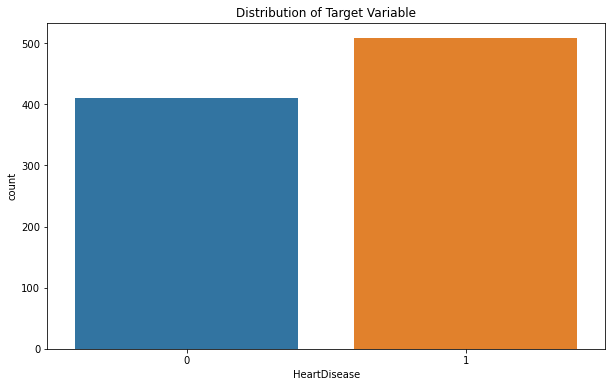

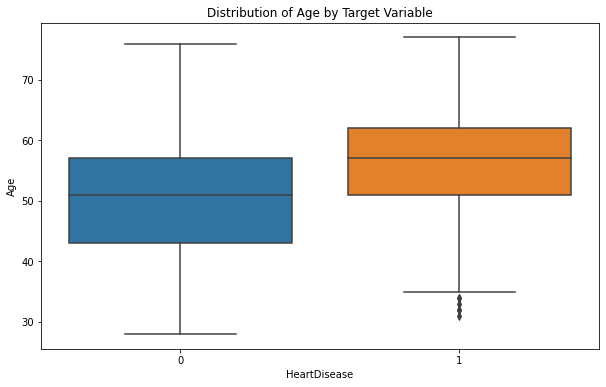

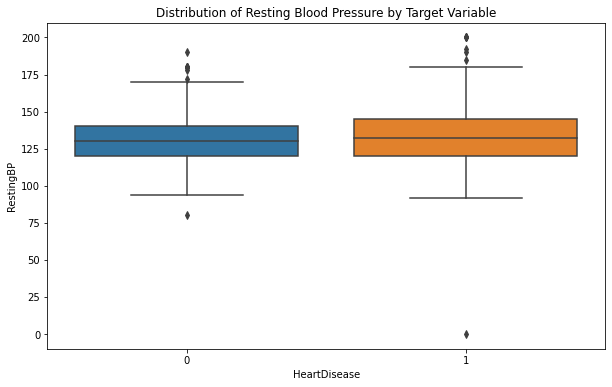

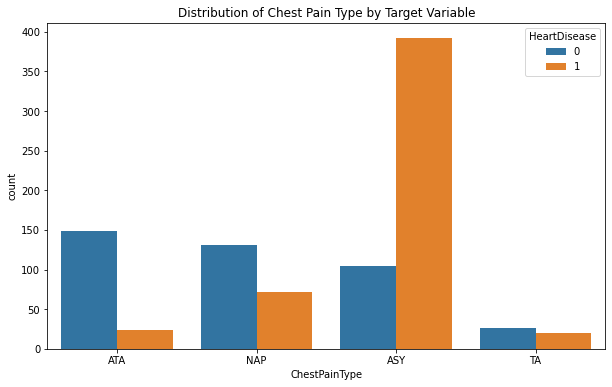

<AxesSubplot:>

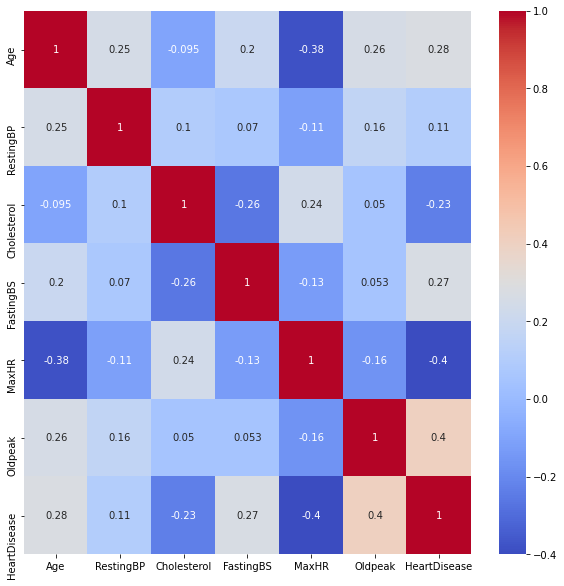

In [12]:
# Step 3: Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Target Variable')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Distribution of Age by Target Variable')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='HeartDisease', y='RestingBP', data=df)
plt.title('Distribution of Resting Blood Pressure by Target Variable')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='ChestPainType', data=df, hue='HeartDisease')
plt.title('Distribution of Chest Pain Type by Target Variable')
plt.show()

plt.figure(figsize=(10,10 ))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [5]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [6]:
# Step 5: Model Selection

# Define three different models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeClassifier()

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Step 5: Model evaluation
# Make predictions on test data
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Calculate performance metrics for regression models
#mse_lr = mean_squared_error(y_test, y_pred_lr)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
#mse_dt = mean_squared_error(y_test, y_pred_dt)

r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate performance metrics for classification models
acc_lr = accuracy_score(y_test, y_pred_lr.round())
acc_rf = accuracy_score(y_test, y_pred_rf.round())
acc_dt = accuracy_score(y_test, y_pred_dt)

# Calculate precision, recall, and f1-score for classification models
report_lr = classification_report(y_test, y_pred_lr.round(), output_dict=True)
report_rf = classification_report(y_test, y_pred_rf.round(), output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

precision_lr = report_lr['1']['precision']
precision_rf = report_rf['1']['precision']
precision_dt = report_dt['1']['precision']

recall_lr = report_lr['1']['recall']
recall_rf = report_rf['1']['recall']
recall_dt = report_dt['1']['recall']

f1_lr = report_lr['1']['f1-score']
f1_rf = report_rf['1']['f1-score']
f1_dt = report_dt['1']['f1-score']

# Create a table of results
import pandas as pd

data = {'Model': ['Linear Regression', 'Random Forest', 'Decision Tree'],
        'Accuracy': [acc_lr, acc_rf, acc_dt],
        'R2': [r2_lr, r2_rf, r2_dt],
        'Precision': [precision_lr, precision_rf, precision_dt],
        'Recall': [recall_lr, recall_rf, recall_dt],
        'F1-score': [f1_lr, f1_rf, f1_dt]}

results = pd.DataFrame(data)
print(results)


               Model  Accuracy        R2  Precision    Recall  F1-score
0  Linear Regression  0.853261  0.535650   0.900000  0.841121  0.869565
1      Random Forest  0.869565  0.589516   0.919192  0.850467  0.883495
2      Decision Tree  0.788043  0.129021   0.861702  0.757009  0.805970


In [8]:
#Step 6: choosing the best model
# Define the weights for each performance metric
w1 = 0.2
w2 = 0.2
w3 = 0.2
w4 = 0.2
w5 = 0.2

# Calculate the weighted score for each model
results['Weighted Score'] = w1 * results['R2'] + w2 * results['Accuracy'] + w3 * results['Precision'] + w4 * results['Recall'] + w5 * results['F1-score']

# Find the index of the best performing model based on the weighted score
best_model = results['Weighted Score'].idxmax()

# Print the name of the best model
print('Overall best model:', results.loc[best_model, 'Model'])


Overall best model: Random Forest


In [12]:
# Step 7: Save the predictions in a CSV file
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_rf})
predictions_df.to_csv("predictions.csv", index=False)

# Show the first 10 rows of the predictions
print(predictions_df.head(10))

     Actual  Predicted
668       0       0.12
30        1       0.64
377       1       0.99
535       1       0.96
807       0       0.00
793       1       0.57
363       1       0.82
583       0       0.06
165       1       0.76
483       1       0.93
